In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('/content/Graduate.Admison.csv')

In [23]:
print(data.head())

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


In [24]:
print(data.isnull().sum())

admit    0
gre      0
gpa      0
rank     0
dtype: int64


In [25]:
print(data.describe())

            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


In [26]:
X = data.drop('admit', axis=1)
y = data['admit']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
model = LogisticRegression(random_state=42)

In [30]:
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [31]:
y_pred = model.predict(X_test_scaled)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


In [33]:
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


              precision    recall  f1-score   support

           0       0.68      0.94      0.79        53
           1       0.57      0.15      0.24        27

    accuracy                           0.68        80
   macro avg       0.63      0.55      0.51        80
weighted avg       0.65      0.68      0.61        80

Confusion Matrix:
[[50  3]
 [23  4]]


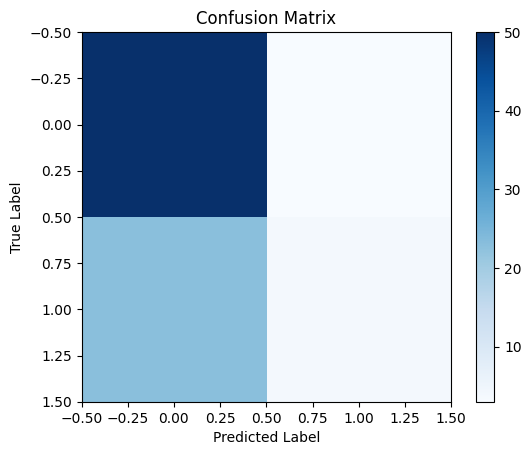

In [34]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()